In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
# from matplotlib import pyplot
# import matplotlib.dates as dates
from matplotlib import pyplot as pyplot, dates
from datetime import date

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import finn_finance as f
from finn_finance import crypto_account

today = date.today()
day_1 = datetime.timedelta(1)
yesterday = today - day_1
get_yesterday = yesterday.strftime("%Y-%m-%d")


In [2]:
file = 'Coinbase-61c7c47cc8f40cd7a72cd6da-TransactionsHistoryReport-2022-09-10-23-11-52.csv'
data_coin = pd.read_csv(file, header=3)


In [3]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-06-26
End Date: 2022-09-24


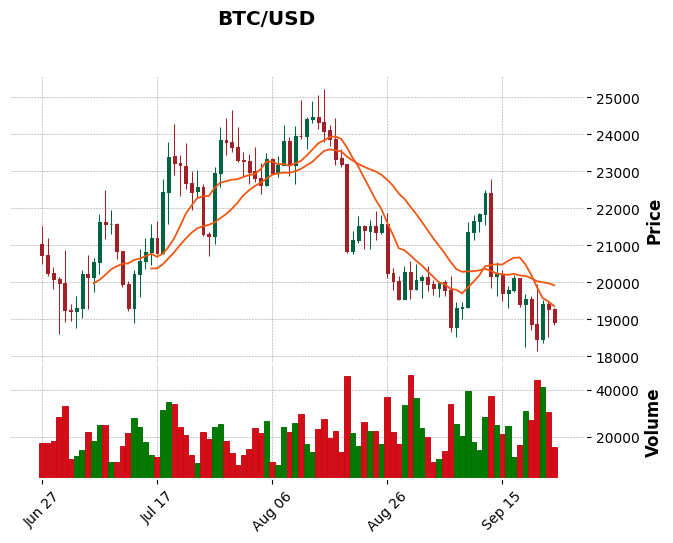

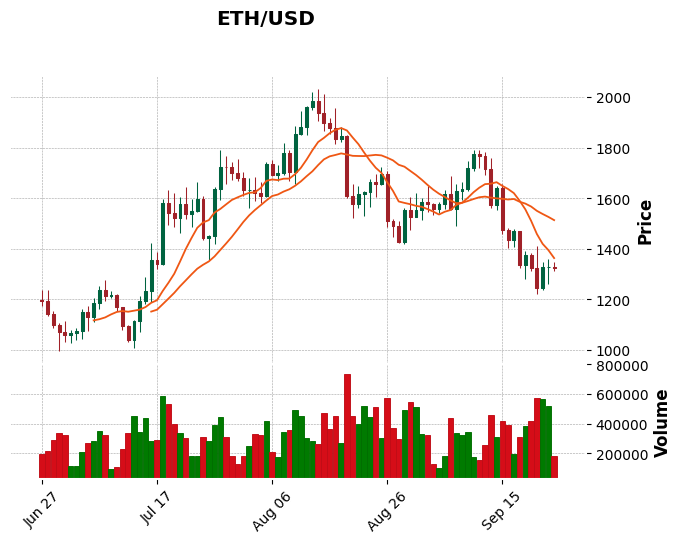

In [4]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    f.candle_stick(date_candle,i)

Bitcoin Value on 2022-09-23 00:00:00: $355.23545578555485


Text(0.5, 1.0, 'Bitcoin Account Value')

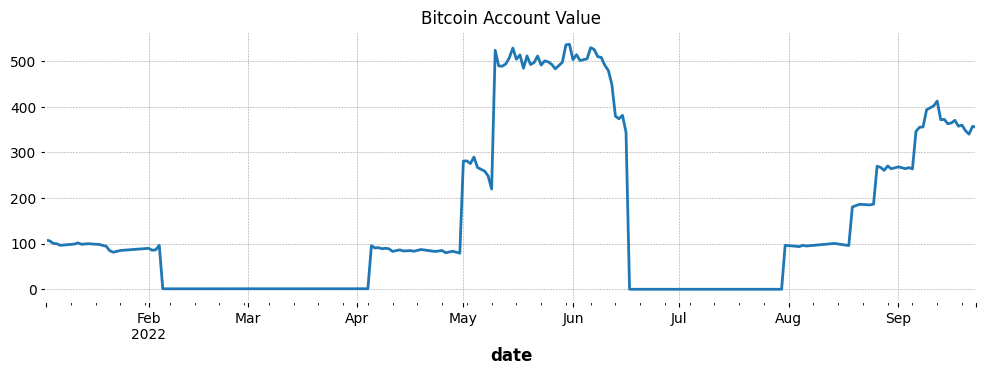

In [5]:
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

print('Bitcoin Value on '+str(df_btc.index.array[len(df_btc)-1])+': $'+str(df_btc.iloc[len(df_btc)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_btc.plot.line(legend=None)
pyplot.title('Bitcoin Account Value')

Ethereum Value on 2022-09-23 00:00:00: $154.23486625062304


Text(0.5, 1.0, 'Ethereum Account Value')

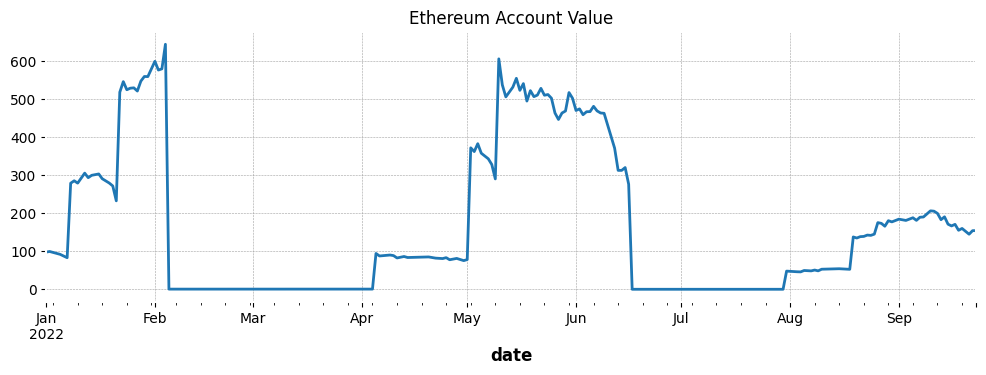

In [6]:
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')

print('Ethereum Value on '+str(df_eth.index.array[len(df_eth)-1])+': $'+str(df_eth.iloc[len(df_eth)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_eth.plot.line(legend=None)
pyplot.title('Ethereum Account Value')

Account Value on 2022-09-23: $509.4703220361779


Text(0.5, 1.0, 'Account Value')

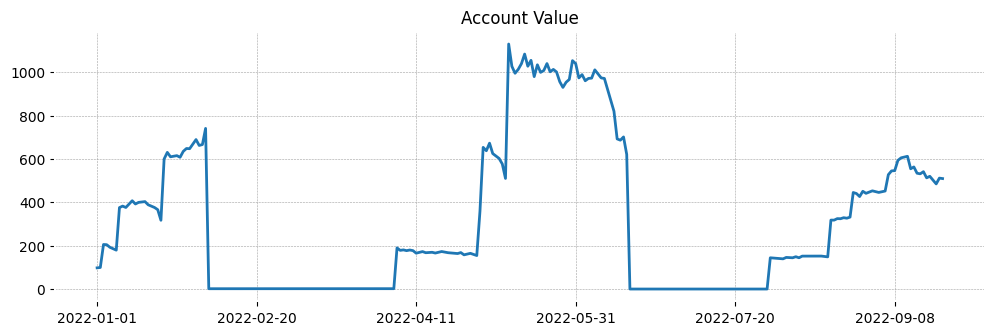

In [7]:
dff_all = crypto_account(data_coin).total_value()
dff_all

print('Account Value on '+str(dff_all.index.array[len(dff_all)-1])+': $'+str(dff_all.iloc[len(dff_all)-1]['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
dff_all.plot.line(legend=None)
pyplot.title('Account Value')

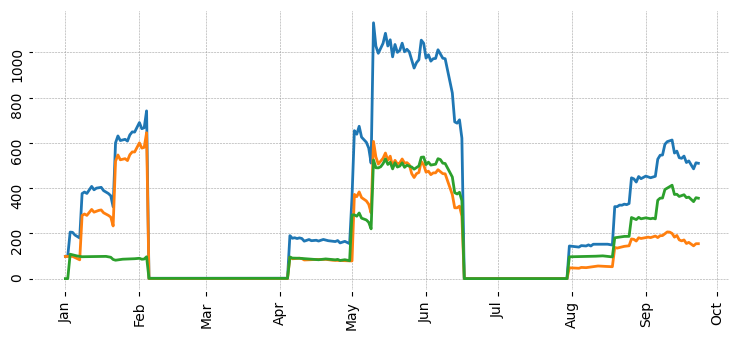

In [8]:
# Plot all 3 data frames
dff_all = crypto_account(data_coin).total_value()
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

date = dff_all.index

days = pd.Series(pd.date_range('20220101', periods=2))
d = [0,0]
missing_dates = pd.DataFrame({'date': days, 'close': d})
missing_dates.astype({'close': 'float64'}).dtypes
missing_dates = missing_dates.set_index('date')
df_btc_equal = pd.concat([missing_dates,df_btc['account_value']],verify_integrity=True,ignore_index=False,sort=True)

pyplot.rcParams["figure.figsize"] = [7.50, 3.50]
pyplot.rcParams["figure.autolayout"] = True
fig, ax = pyplot.subplots()
ax.plot(dff_all.index, dff_all['close'])
pyplot.plot(dff_all.index,df_eth['account_value']['close'])
pyplot.plot(dff_all.index,df_btc_equal['close'])
pyplot.tick_params(rotation=90)
months = dates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
pyplot.show()
